## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


**QUESTION:** Load dataset and display some lines of the csv file.

In [ ]:
df = pd.read_csv("/content/ai4i2020.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

<ipython-input-4-6f993e1490c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=failure_counts.index, y=failure_counts.values, palette=["blue", "red"])


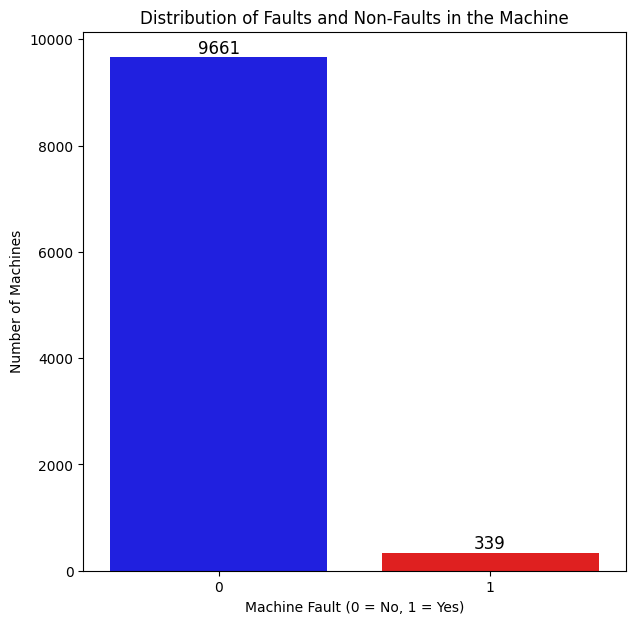

In [ ]:
failure_counts = df['Machine failure'].value_counts()

plt.figure(figsize=(7, 7))
ax = sns.barplot(x=failure_counts.index, y=failure_counts.values, palette=["blue", "red"])

for i, value in enumerate(failure_counts.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=12)

plt.xlabel("Machine Fault (0 = No, 1 = Yes)")
plt.ylabel("Number of Machines")
plt.title("Distribution of Faults and Non-Faults in the Machine")

plt.show()


**ANALYSIS QUESTION:** What do you observe?

O sistema apresenta um baixa quantidade percentual de falhas (3,39 %).

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Como os dados não estão bem distribuidos entre falha e não falha, o modelo provavelmente vai acertar mais quando não houver uma falha em comparação a quando houver uma falha.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

<ipython-input-5-235485598937>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=failure_counts.index, y=failure_counts.values, palette=['blue', 'orange', 'green', 'red', 'purple'] )


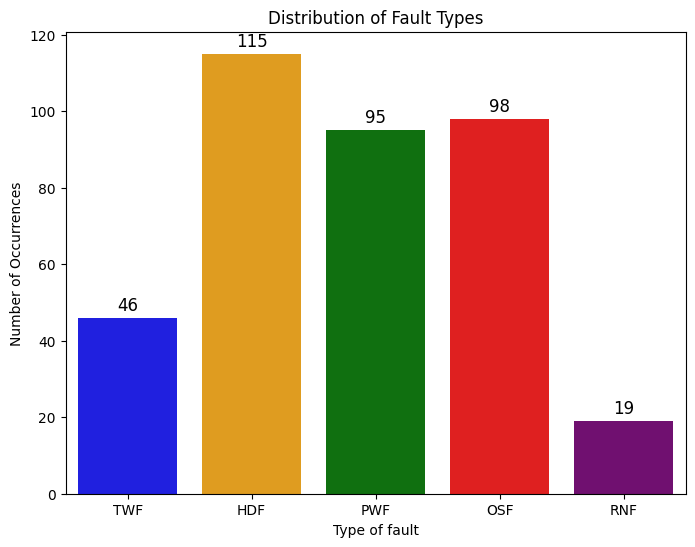

In [ ]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=failure_counts.index, y=failure_counts.values, palette=['blue', 'orange', 'green', 'red', 'purple'] )

for i, value in enumerate(failure_counts.values):
    ax.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.xlabel("Type of fault")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Fault Types")

plt.show()


**ANALYSIS QUESTION:** What do you observe?

Pode-se observar que existe uma maior ocorrência das falhas do tipo HDF, PWF e OSF em comparação as do tipo TWF e RNF. Vale ressaltar, que a soma das falhas de cada tipo obtemos um valor total de 373 falhas, no entanto como observado no primeiro gráfico ("Distribution of Faults and Non-Faults in the Machine") há um total de 339 falhas. Isso ocorre por conta de certas máquinas possuírem falhas simultaneas, além disso as falhas aleatórias (RNF) não são contabilizadas como falhas.



**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

<ipython-input-6-708757154ff1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=failure_counts.index, y=failure_counts.values,  palette=['blue', 'orange', 'green', 'red', 'purple', 'gray'])


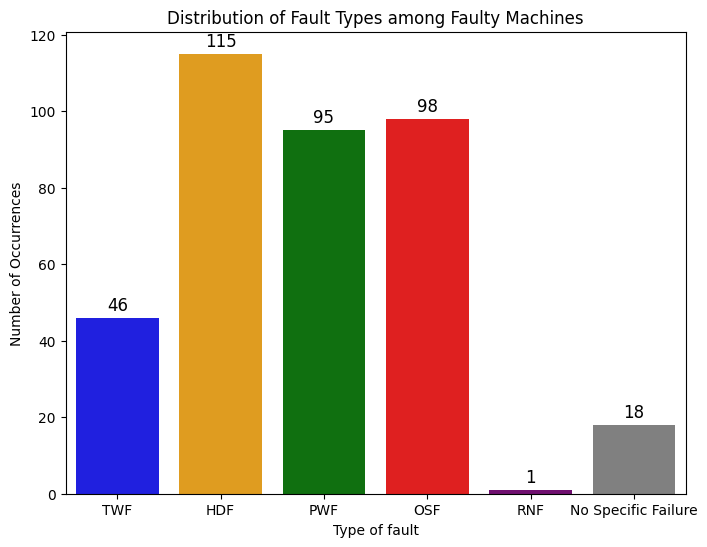

In [ ]:
failed_machines = df[df["Machine failure"] == 1]

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = failed_machines[failure_types].sum()

no_specific_failure = df[(df["Machine failure"] == 0) & (df["RNF"] == 1)].shape[0]

failure_counts["No Specific Failure"] = no_specific_failure

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=failure_counts.index, y=failure_counts.values,  palette=['blue', 'orange', 'green', 'red', 'purple', 'gray'])

for i, value in enumerate(failure_counts.values):
    ax.text(i, value + 2, str(value), ha='center', fontsize=12)

plt.xlabel("Type of fault")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Fault Types among Faulty Machines")

plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

Como já mencionado, as falhas do tipo aleatório nao são contabilizadas na coluna "Machine Failure", dessa forma a barra "No Specific Failure" foi criada para comtemplar esses casos. No gráfico anterior foram contabilizadas 19 falhas "RNF", no entando, no gráfico atual existem 18 falhas "No Specific Failure" (que são falhas "RNF" não contabilizadas) e 1 uma falha "RNF", essa falha só foi contabilizada pois existe uma outra falha simultanea.

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [ ]:
df.dtypes

,0
UDI,int64
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Machine failure,int64
TWF,int64


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

As entradas do modelo serão as colunas que represetam os paramentros das máquinas: Type, Air temperature, Process temperature, Rotational speed, Torque, Tool wear. Já as saídas serão as colunas que indicam as falhas e seus tipos: Machine failure, TWF, HDF, PWF, OSF e RNF.

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
X = df.drop(columns=['Machine failure', 'UDI', 'Product ID'])
X = pd.get_dummies(X, columns=['Type'])

Y = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Number of elements in X_train: {X_train.shape}")
print(f"Number of elements in Y_train: {Y_train.shape}")
print(f"Number of elements in X_test: {X_test.shape}")
print(f"Number of elements in Y_test: {Y_test.shape}")


Number of elements in X_train: (8000, 13)
Number of elements in Y_train: (8000, 5)
Number of elements in X_test: (2000, 13)
Number of elements in Y_test: (2000, 5)


**QUESTION** Code below the model architecture

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,141 (12.27 KB)

 Trainable params: 3,141 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7087 - loss: 7.8029 - val_accuracy: 0.5500 - val_loss: 1.0823
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4079 - loss: 1.1928 - val_accuracy: 0.0110 - val_loss: 0.5742
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0939 - loss: 0.6338 - val_accuracy: 0.0165 - val_loss: 0.2940
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0520 - loss: 0.4076 - val_accuracy: 0.0110 - val_loss: 0.2425
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0305 - loss: 0.3456 - val_accuracy: 0.0170 - val_loss: 0.1609
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0365 - loss: 0.2347 - val_accuracy: 0.0115 - val_loss: 0.0997
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0402 - loss: 0.1583 - val_accuracy: 0.0110 - val_loss: 0.1024
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0351 - loss: 0.1196 - val_accuracy: 0.

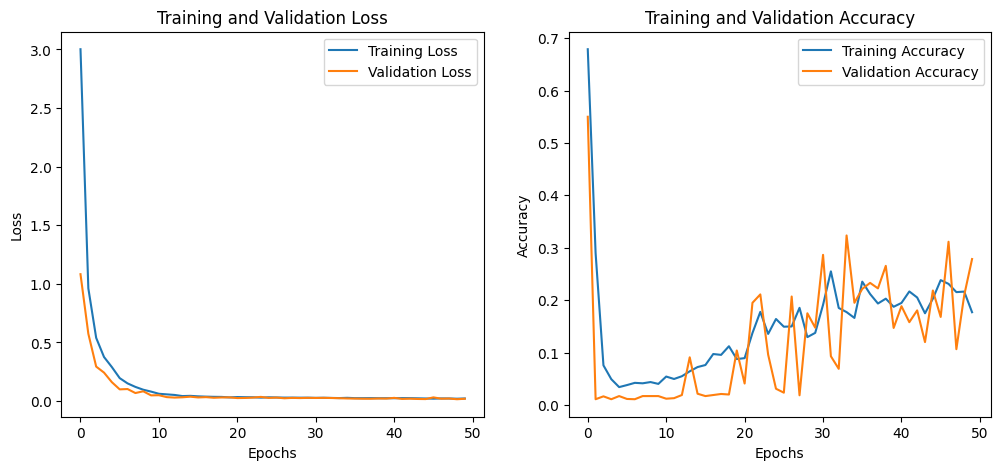

In [ ]:
epochs = 50
batch_size = 32

history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


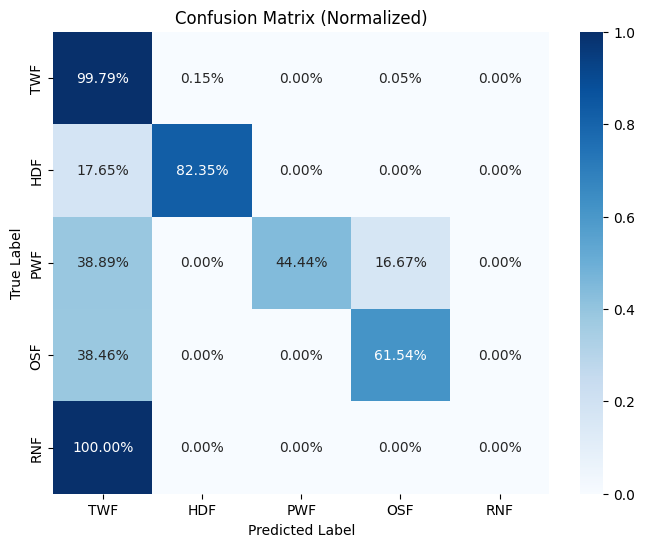

Classification Report:
               precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        11
         HDF       0.82      0.82      0.82        17
         PWF       1.00      0.40      0.57        20
         OSF       1.00      0.72      0.84        18
         RNF       0.00      0.00      0.00         6

   micro avg       0.90      0.49      0.63        72
   macro avg       0.56      0.39      0.45        72
weighted avg       0.72      0.49      0.56        72
 samples avg       0.02      0.02      0.02        72



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fazer previsões
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  # Converter probabilidades para 0 ou 1

# Listar os nomes das classes de falha
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Criar a matriz de confusão para todas as classes
cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))

# 🔹 Normalizar os valores para que sejam proporções (%)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Criar um mapa de calor para a matriz de confusão normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues", xticklabels=failure_types, yticklabels=failure_types)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Normalized)")

plt.show()

# 🔹 Exibir o relatório de classificação
report = classification_report(Y_test, Y_pred, target_names=failure_types)
print("Classification Report:\n", report)


**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
X = df.drop(columns=['Machine failure', 'UDI', 'Product ID'])
X = pd.get_dummies(X, columns=['Type'])

Y = df['Machine failure']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print(f"X_train (original): {X_train.shape[0]} lines")
print(f"Y_train (original): {Y_train.shape[0]} lines")
print(f"X_train (rebalanced): {X_train_resampled.shape[0]} lines")
print(f"Y_train (rebalanced): {Y_train_resampled.shape[0]} lines")
print(f"X_test: {X_test.shape[0]} lines")
print(f"Y_test: {Y_test.shape[0]} lines")

X_train (original): 8000 lines
Y_train (original): 8000 lines
X_train (rebalanced): 15444 lines
Y_train (rebalanced): 15444 lines
X_test: 2000 lines
Y_test: 2000 lines


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

In [ ]:
model_balanced = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_balanced.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

**QUESTION** Code below the algorithms allowing to train model


Epoch 1/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5362 - loss: 15.3308 - val_accuracy: 0.1180 - val_loss: 2.4396
Epoch 2/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6895 - loss: 1.1009 - val_accuracy: 0.9580 - val_loss: 0.1603
Epoch 3/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7347 - loss: 0.7241 - val_accuracy: 0.9390 - val_loss: 0.1952
Epoch 4/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7768 - loss: 0.5597 - val_accuracy: 0.7670 - val_loss: 0.5747
Epoch 5/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.5396 - val_accuracy: 0.3015 - val_loss: 1.4113
Epoch 6/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.5077 - val_accuracy: 0.7710 - val_loss: 0.5737
Epoch 7/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8165 - loss: 0.4449 - val_accuracy: 0.9405 - val_loss: 0.1854
Epoch 8/50
483/483 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8281 - loss: 0.4194 - val_accuracy: 0

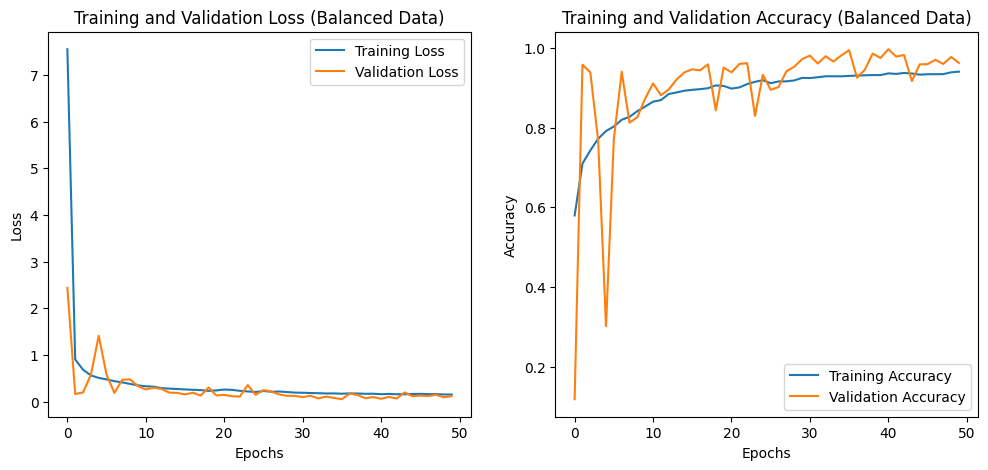

In [ ]:
epochs = 50
batch_size = 32

history_balanced = model_balanced.fit(X_train_resampled, Y_train_resampled,
                                      validation_data=(X_test, Y_test),
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      verbose=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_balanced.history['loss'], label='Training Loss')
plt.plot(history_balanced.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Balanced Data)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_balanced.history['accuracy'], label='Training Accuracy')
plt.plot(history_balanced.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Balanced Data)')
plt.legend()

plt.show()


**QUESTION** Plot the confusion matrix and the classification report

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


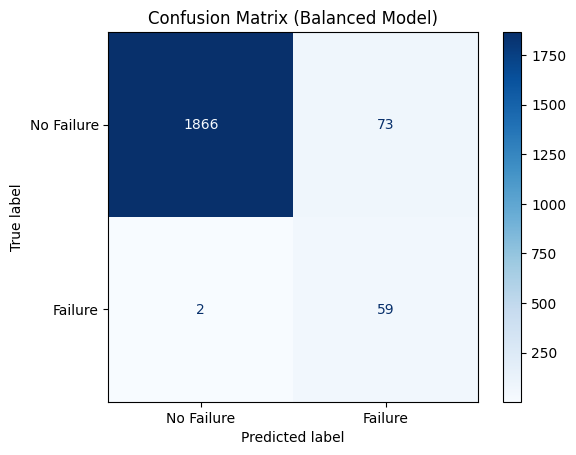

Classification Report (Balanced Model):
               precision    recall  f1-score   support

  No Failure       1.00      0.96      0.98      1939
     Failure       0.45      0.97      0.61        61

    accuracy                           0.96      2000
   macro avg       0.72      0.96      0.80      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
Y_pred_balanced = model_balanced.predict(X_test)
Y_pred_balanced = (Y_pred_balanced > 0.5).astype(int)

cm_balanced = confusion_matrix(Y_test, Y_pred_balanced)

disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=["No Failure", "Failure"])
disp_balanced.plot(cmap="Blues")
plt.title("Confusion Matrix (Balanced Model)")
plt.show()

report_balanced = classification_report(Y_test, Y_pred_balanced, target_names=["No Failure", "Failure"])
print("Classification Report (Balanced Model):\n", report_balanced)

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"